# Main Objectives of this EDA: 
- Subsection data by market 
- get count ad distrubution of overall stars 
- map is open 

In [1]:
# Loading up the Imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading in the dataset 
business = pd.read_csv("~/DSI/capstone_project/data/yelp_business.csv")
attribs = pd.read_csv("~/DSI/capstone_project/data/yelp_business_attributes.csv")

In [5]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [6]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
business_id     174567 non-null object
name            174567 non-null object
neighborhood    68015 non-null object
address         174567 non-null object
city            174566 non-null object
state           174566 non-null object
postal_code     173944 non-null object
latitude        174566 non-null float64
longitude       174566 non-null float64
stars           174567 non-null float64
review_count    174567 non-null int64
is_open         174567 non-null int64
categories      174567 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


In [7]:
business["state"].unique()

array(['AZ', 'PA', 'OH', 'BW', 'NV', 'ON', 'NC', 'WI', 'SC', 'QC', 'IL',
       'MLN', 'EDH', 'FIF', 'CHE', 'CO', 'NYK', 'NE', 'HLD', 'WLN', 'ABE',
       'WA', 'SCB', 'KHL', 'ESX', 'CMA', 'FAL', 'ELN', 'NY', 'PKN', 'ST',
       '01', 'CA', 'NLK', 'GLG', 'C', 'VS', 'IN', 'XGL', 'AL', 'STG',
       'VT', 'CS', '30', 'AR', 'SL', 'NI', 'BY', 'AK', 'FLN', nan, 'FL',
       'MN', '6', 'NTH', 'MT', 'B', 'GA', 'VA', 'DE', 'AB', 'HU', 'KY',
       '3', 'TAM', 'ZET', 'RCC', 'WHT'], dtype=object)

In [8]:
business["state"].value_counts()

AZ     52214
NV     33086
ON     30208
NC     12956
OH     12609
PA     10109
QC      8169
WI      4754
EDH     3795
BW      3118
IL      1852
SC       679
MLN      208
HLD      179
NYK      152
CHE      143
FIF       85
ELN       47
WLN       38
C         28
NY        18
ESX       12
ST        11
01        10
NI        10
VS         7
SCB        5
CA         5
BY         4
XGL        4
       ...  
CMA        2
FLN        2
AR         2
AL         1
MT         1
WHT        1
DE         1
FAL        1
3          1
TAM        1
STG        1
ZET        1
AB         1
HU         1
B          1
RCC        1
NLK        1
NE         1
VA         1
30         1
CS         1
WA         1
SL         1
FL         1
KY         1
PKN        1
MN         1
GA         1
AK         1
KHL        1
Name: state, Length: 67, dtype: int64

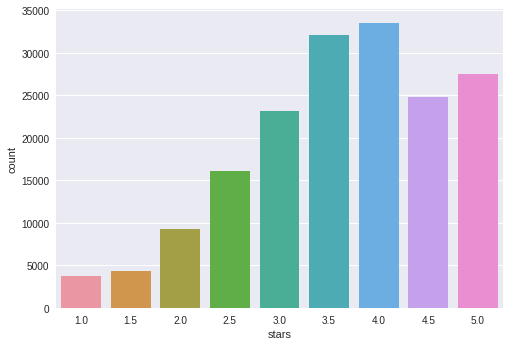

In [9]:
sns.set(style="darkgrid")
ax = sns.countplot(x="stars", data=business)

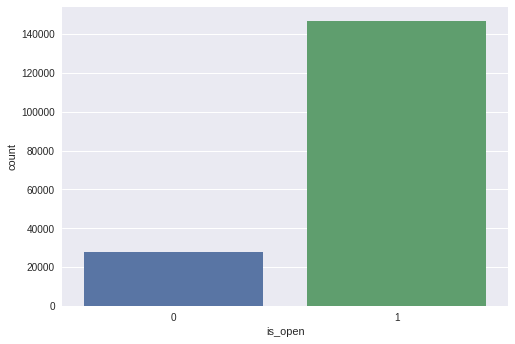

In [10]:
sns.set(style="darkgrid")
ax = sns.countplot(x="is_open", data=business)

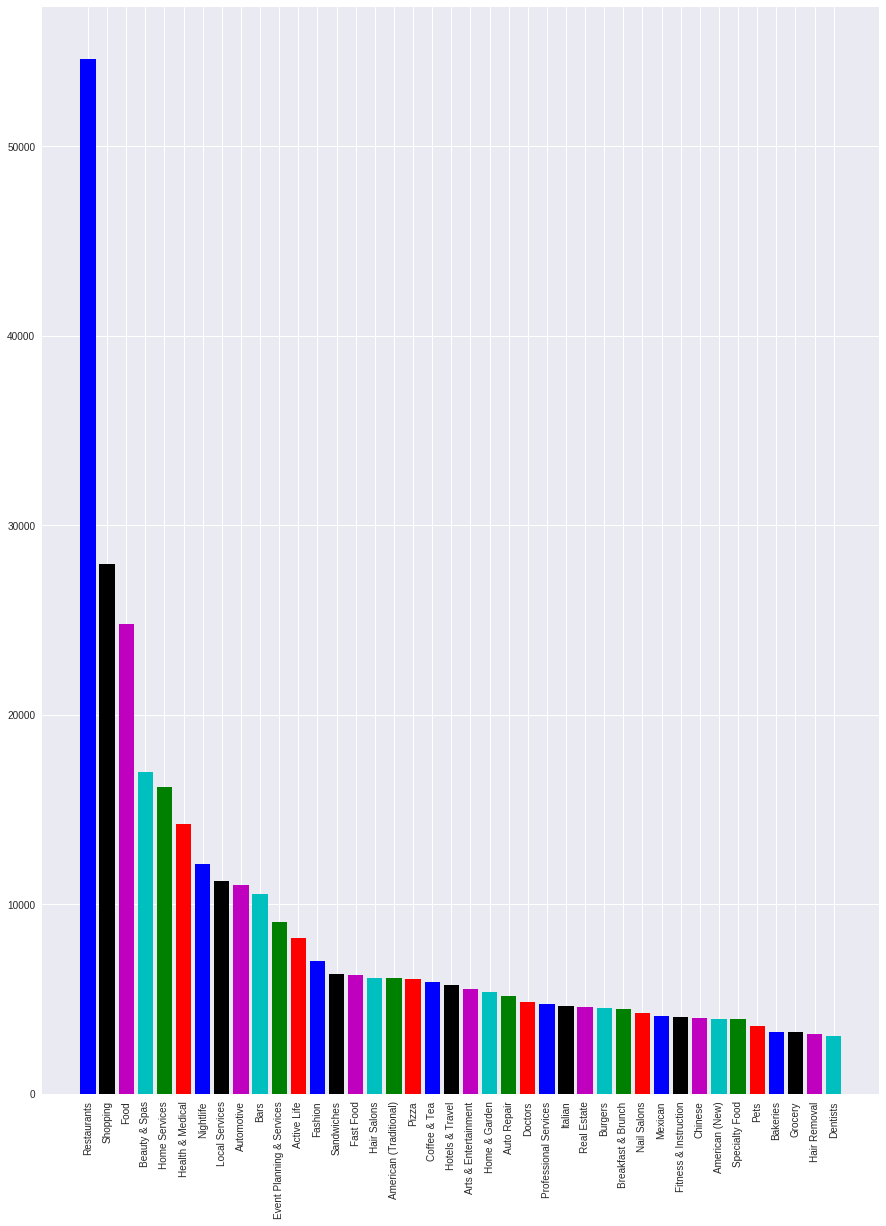

In [14]:
Categories={}

for x in business["categories"]:
    all_categories=x.split(";")
    for cat in all_categories:
        if cat not in Categories:
            Categories[cat]=1
        else:
            Categories[cat]+=1
All_categories=list(Categories.keys())
Cat_list=[[x,Categories[x]] for x in All_categories]

Cat_list=sorted(Cat_list, key=lambda x: x[1], reverse=True)

# plottingthe top 40 Categories of business
Cat_list=Cat_list[:40]
plt.figure(figsize=(15,20))
plt.bar(range(len(Cat_list)),[x[1] for x in Cat_list] ,align="center", color="bkmcgr")
plt.xticks(range(len(Cat_list)), [x[0] for x in Cat_list], rotation="vertical")
plt.show()

In [18]:
business[business['categories'].str.contains("Restaurant", "food")]

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",NaN,"""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...
14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Uptown,"""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,Restaurants;American (Traditional)
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",Yonge and Eglinton,"""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,Italian;French;Restaurants
19,Gu-xs3NIQTj3Mj2xYoN2aw,"""Maxim Bakery & Restaurant""",NaN,"""9665 Bayview Avenue, Unit 1-4""",Richmond Hill,ON,L4C 9V4,43.867565,-79.412662,3.5,34,1,French;Food;Bakeries;Restaurants
25,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,3.5,39,1,Tiki Bars;Nightlife;Mexican;Restaurants;Bars
28,Dj0S-Oe4ytRJzMGUPgYUkw,"""Panera Bread""",NaN,"""38295 Chestnut Ridge Rd""",Elyria,OH,44035,41.343078,-82.067140,2.0,4,1,Soup;Salad;Sandwiches;Restaurants
29,gAy4LYpsScrj8POnCW6btQ,"""Toast Cafe""",NaN,"""2429 Hwy 160 W""",Fort Mill,SC,29708,35.047287,-80.990559,3.5,6,0,Food;American (Traditional);Coffee & Tea;Resta...
30,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",NaN,"""2777 Steeles Avenue W""",Toronto,ON,M3J 3K5,43.781816,-79.490433,5.0,3,1,Restaurants;Breakfast & Brunch


### Note:
`Restaurants` and `Food` are catch-all terms to get all business related to food. (Bakeries, Pizza etc all have one or both of these descriptors/categories)

In [19]:
food = business[business['categories'].str.contains("Restaurant", "food")]

In [ ]:
# df.to_csv(file_name, encoding='utf-8', index=False)

In [22]:
# food.to_csv('business_food', index=False)

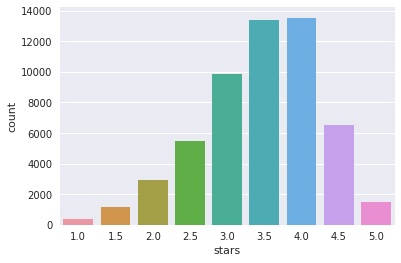

In [11]:
sns.set(style="darkgrid")
ax = sns.countplot(x="stars", data=food)

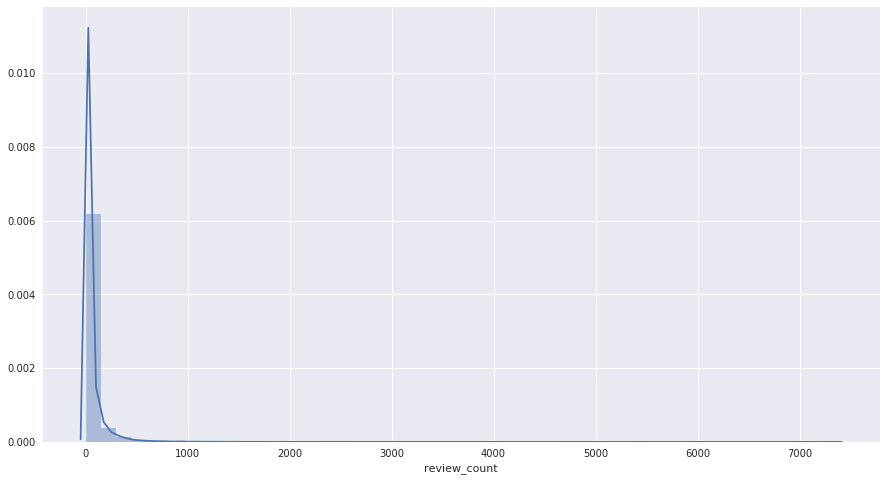

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.distplot(food["review_count"])

List of state in Northeast: 
Connecticut, Delaware, Maine, Massachusetts, Maryland, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, and Vermont.

In [36]:
food[food["state"].str.contains("MA", "CI", "DE", "MD", "NH", "NJ", "NY", "PA", "RI", "VT")]

array(['OH', 'BW', 'PA', 'NC', 'ON', 'SC', 'QC', 'AZ', 'NV', 'MLN', 'WI',
       'IL', 'EDH', 'CO', 'CHE', 'HLD', 'ABE', 'NYK', 'KHL', 'FIF', 'NY',
       'PKN', 'ST', '01', 'WLN', 'C', 'IN', 'CA', 'ESX', '30', 'ELN',
       'NI', 'BY', 'AK', '6', 'B', 'VA', 'HU', '3', 'VS', 'XGL', 'ZET',
       'RCC', 'WHT', 'GLG'], dtype=object)

In [37]:
food["state"].unique()

array(['OH', 'BW', 'PA', 'NC', 'ON', 'SC', 'QC', 'AZ', 'NV', 'MLN', 'WI',
       'IL', 'EDH', 'CO', 'CHE', 'HLD', 'ABE', 'NYK', 'KHL', 'FIF', 'NY',
       'PKN', 'ST', '01', 'WLN', 'C', 'IN', 'CA', 'ESX', '30', 'ELN',
       'NI', 'BY', 'AK', '6', 'B', 'VA', 'HU', '3', 'VS', 'XGL', 'ZET',
       'RCC', 'WHT', 'GLG'], dtype=object)

In [38]:
food[food["state"].str.contains("NY")]

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
5755,Rv7TH2KWTUXpjFPwTTp4Xg,"""Bonnet & Sons""",NaN,"""38-40 Huntriss Row""",Scarborough,NYK,YO11 2EF,54.281476,-0.399985,3.5,3,1,Coffee & Tea;Food;Cafes;Restaurants
8668,-Rw3wxbeHhZy6SURriXZ8g,"""Filion's Diner""",NaN,"""7030 US Route 11""",Churubusco,NY,12923,44.926400,-73.943057,4.5,9,1,Restaurants
9450,Wijq97TO27mhi_OG-xaW-w,"""Golden Grid Restaurant""",NaN,"""4 Sandside""",Scarborough,NYK,YO11 1PE,54.284073,-0.391210,3.5,3,1,Seafood;Restaurants
17974,l2M67j_7O0fOJiE28yaREA,"""Station Tea Rooms""",NaN,"""Station Lane, Station House Cloughton""",Scarborough,NYK,YO13 0AD,54.332609,-0.446601,4.5,3,1,Restaurants;Coffee & Tea;Cafes;Food
19975,xkha6iK_PLsUqnFB-CJW5g,"""Valero""",NaN,"""1038 Rt 11""",Champlain,NY,12919,44.982014,-73.459030,2.5,3,1,Gas Stations;Hot Dogs;Fast Food;Food;Convenien...
20013,3y5kPTXhLlyG8ZDZy37JpQ,"""Beckett's Coffee Shop""",NaN,"""9 Skinner Street""",Whitby,NYK,YO21 3AD,54.486977,-0.617231,5.0,5,1,Food;Restaurants;Patisserie/Cake Shop;Cafes
21562,mOgLOq01wZ8MVAGjY7uYYg,"""The Green Room""",NaN,"""138 Victoria Road""",Scarborough,NYK,YO11 1SL,54.280216,-0.407867,4.5,3,1,Restaurants
22817,6ipr7nnwrzf_o3MGD-8nlA,"""Gino's Pizza""",NaN,"""46 Lake St""",Rouses Point,NY,12979,44.995906,-73.365716,4.5,10,1,Restaurants;Pizza
23625,fspp2HRzbg268BYhbA6OxA,"""McDonald's Restaurants""",NaN,"""11-17 Huntriss Row""",Scarborough,NYK,YO11 2ED,54.281456,-0.400508,2.5,3,1,Restaurants;American (Traditional)
29718,LYgJqrjvk-Orrd-zfl09iA,"""Small Fry Cafe""",NaN,"""52 North Street""",Scarborough,NYK,YO11 1DE,54.283670,-0.401681,4.5,3,1,Cafes;Restaurants;Fish & Chips


In [43]:
business[business["state"].str.contains("NY")]

ValueError: cannot index with vector containing NA / NaN values

In [5]:
attribs.head()

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
